In [67]:
!pip install scikit-learn
import pickle
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns




Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
df= pd.read_csv("C:\\Users\\Dell\\Desktop\\python\\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
print (f''' no. of rows: {df.shape[0]}
no. of columns: {df.shape[1]}''')

 no. of rows: 150
no. of columns: 5


In [70]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Measurments')

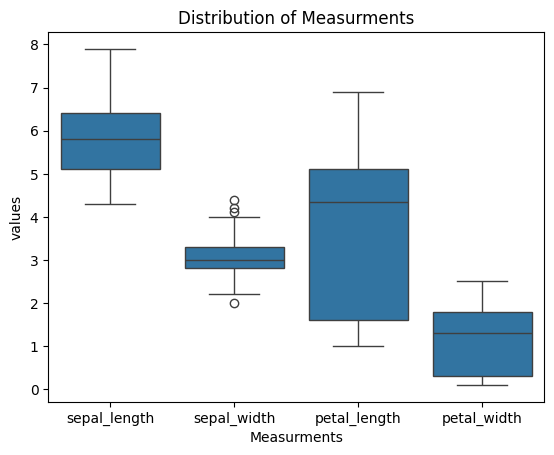

In [71]:
df1= df.drop('species', axis=1).melt(value_vars=df.drop('species',axis=1).columns)
sns.boxplot(df1,x='variable', y='value')
plt.xlabel('Measurments')
plt.ylabel('values')
plt.title('Distribution of Measurments')


In [72]:
x= df.drop('species',axis=1)
y= df['species']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state= 101, stratify=y)
print(f'''x Train: {x_train.shape}
x Test= {x_test.shape}
y Train= {y_train.shape}
y Test= {y_test.shape}''')

x Train: (120, 4)
x Test= (30, 4)
y Train= (120,)
y Test= (30,)


In [75]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import sklearn as sl
!pip install standardscaler

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
!pip install pipeline
!pip install StandardScaler
!pip install preprocess

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/840.9 kB ? eta -:--:--
     --                                      61.4/840.9 kB 1.7 MB/s eta 0:00:01
     ------                                 143.4/840.9 kB 2.1 MB/s eta 0:00:01
     ------------                           276.5/840.9 kB 2.8 MB/s eta 0:00:01
     ---------------------                  481.3/840.9 kB 3.4 MB/s eta 0:00:01
     -------------------------------        686.1/840.9 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 840.9/840.9 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492054 sha256=14ebb6340cee7213dd7cff8b09f36

In [97]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix


In [99]:
preprocess = Pipeline([
    ('scaler', StandardScaler())
])
model = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LogisticRegression(multi_class='multinomial'))
])
model.fit(x_train,y_train)
     

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [100]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'confusion matrix for the classification')

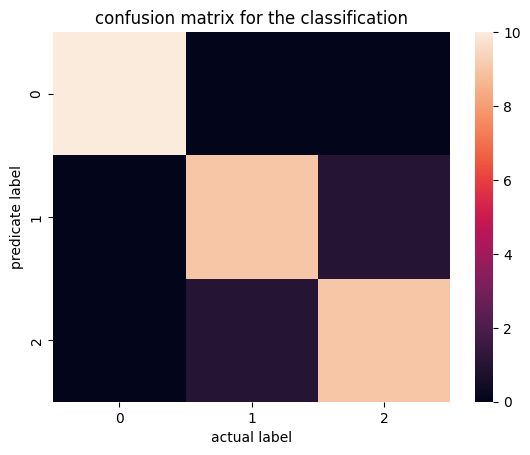

In [105]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm)
plt.xlabel('actual label')
plt.ylabel('predicate label')
plt.title('confusion matrix for the classification')

In [106]:
with open('./model.pk1','wb') as fp:
    pickle.dump(model, fp)